# Sales Prediction For DOT Glasses

# 1. Clean the dataset :

# Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline

# Reading the Dataset

In [2]:
data = pd.read_csv(r"D:\all data\advertising.csv")

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Basic information about data - EDA

# Count Null and Non-Null Values:

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Checking duplicate rows

In [6]:
data[data.duplicated()]


,TV,Radio,Newspaper,Sales


In [7]:
len(data[data.duplicated()])


0

# Statistical Summary

In [8]:
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data['Newspaper'].mean()


30.553999999999995

# Visualize the data using Boxplot

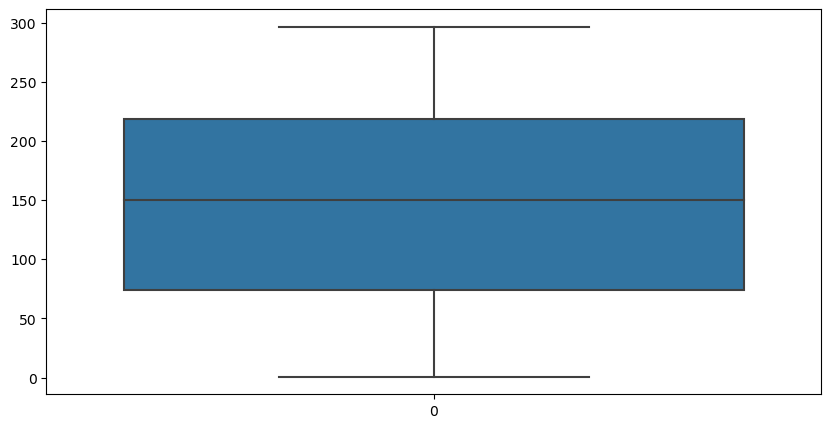

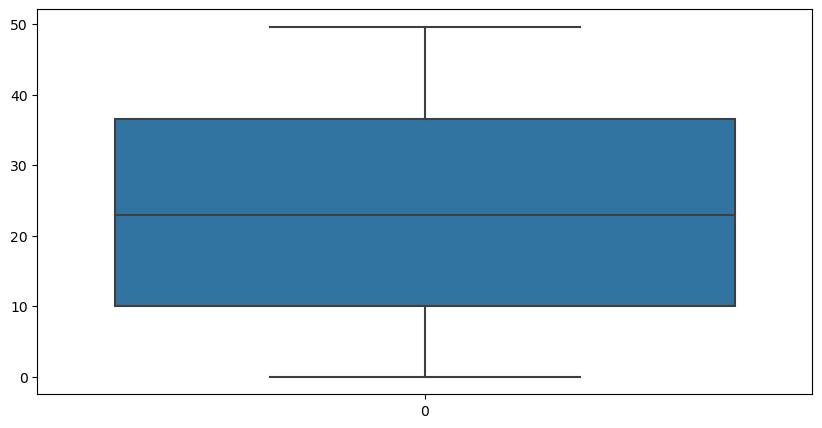

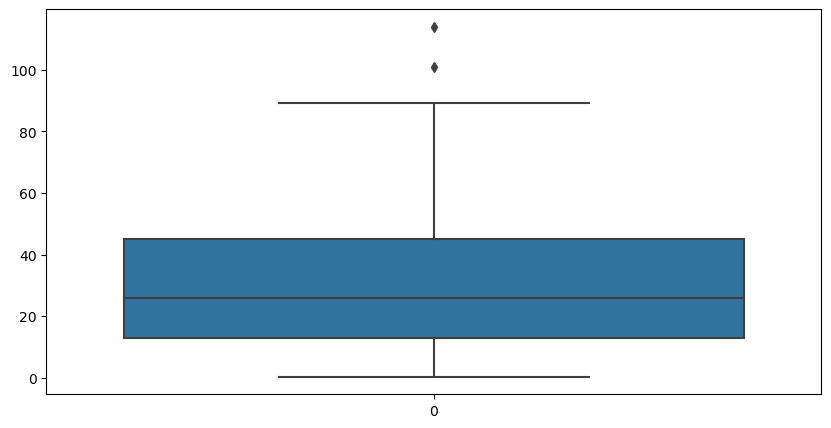

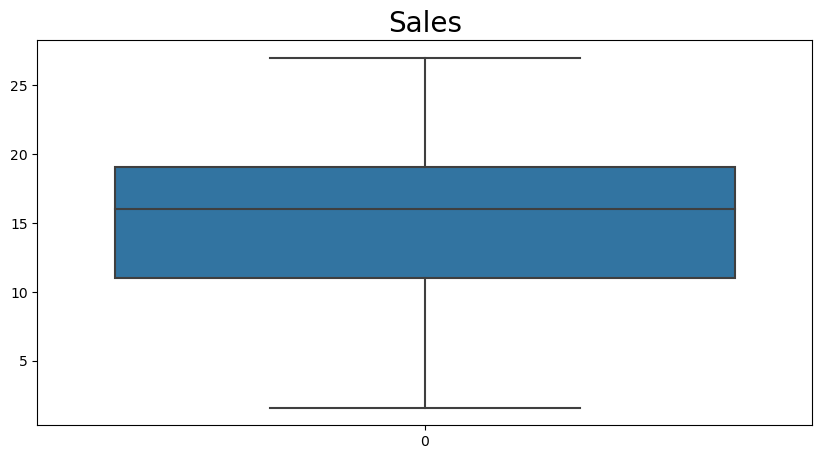

In [11]:
   

for c in ['TV', 'Radio', 'Newspaper', 'Sales']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[c])
  
plt.title(c, fontsize=20)
plt.show()



# As we see clearily on the bases of boxplot we have outliers exist only in Newspaper column

# checking outliers

# checking outiers in Newspaper column

In [17]:
q1,q3=np.percentile(data["Newspaper"],[25,75])
IQR=q3-q1
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)
outliers = ((data["Newspaper"] < (q1 - 1.5 * IQR)) | (data["Newspaper"] > (q3 + 1.5 * IQR)))
print(outliers.sum())
outlier_list = data["Newspaper"][outliers].tolist()

2


In [18]:
# Print the list of outlier values
print(outlier_list)

[114.0, 100.9]


In [20]:
data=data.loc[(data['Newspaper']>=lb) & (data['Newspaper']<=ub)]
# df=df.loc[(df['Newspaper']>=lb) & (df['Newspaper']<=ub)]

In [22]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Text(0.5, 0, 'Newspaper')

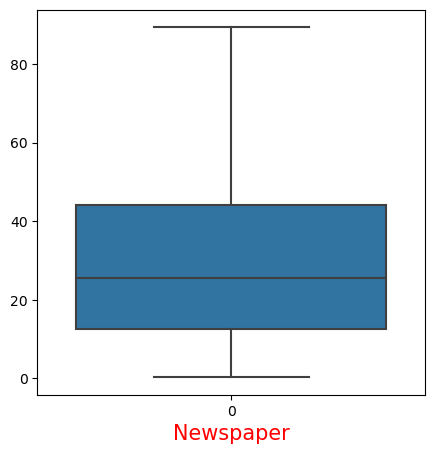

In [23]:
plt.figure(figsize=[5,5])
sns.boxplot(data["Newspaper"])
plt.xlabel("Newspaper",fontsize=15,color="red")

 
 # filling outliers values with np.nan in Newspaper column

In [ ]:
data.loc[data['Newspaper']>95 , 'Newspaper'] = np.NaN

# If i want to fill all NaN values with mean value of 'Newspaper'

In [ ]:
data.fillna(data['Newspaper'].mean())

# 2. Exploratory Data Analysis (EDA)

# Know the datatypes

In [ ]:
data.dtypes

# Correlation Plot - EDA

# correlation

In [ ]:
data.corr()


In [ ]:
data.corr()['Sales']


# Use Heatmap to see Correlation

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr())
plt.title("Heatmap of the dataset")

# Use Scatter plots to see how the target variable is related to each other

In [ ]:
sns.scatterplot(x='TV',y='Sales',hue='Sales',data=data)
plt.title("Relation between TV and Sales column",fontsize=15)

In [ ]:
sns.scatterplot(x='Radio',y='Sales',hue='Sales',data=data)
plt.title("Relation between Radio and Sales column",fontsize=15)

In [ ]:
sns.scatterplot(x='Newspaper',y='Sales',hue='Sales',data=data)
plt.title("Relation between Newspaper and Sales column",fontsize=15)

# Use barplot to see the distribution of sales column with other columns :

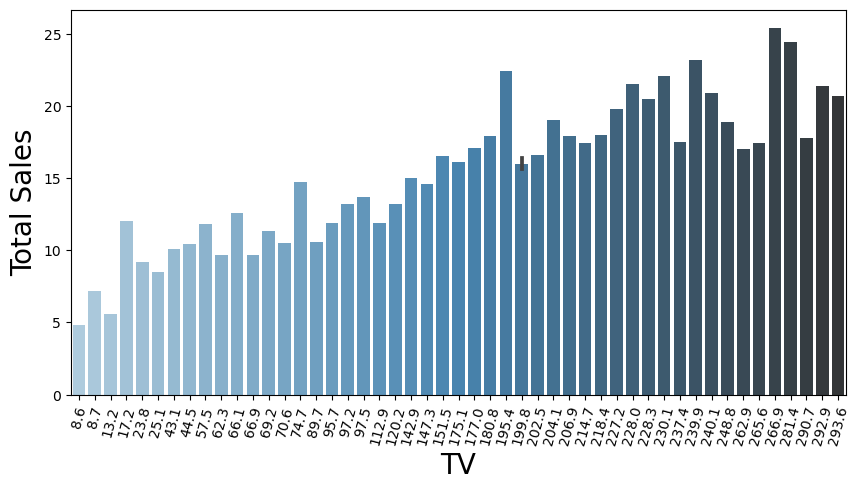

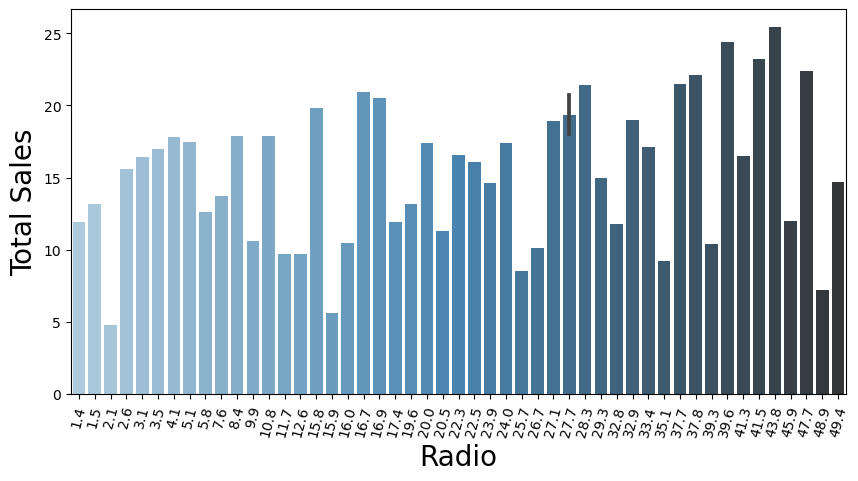

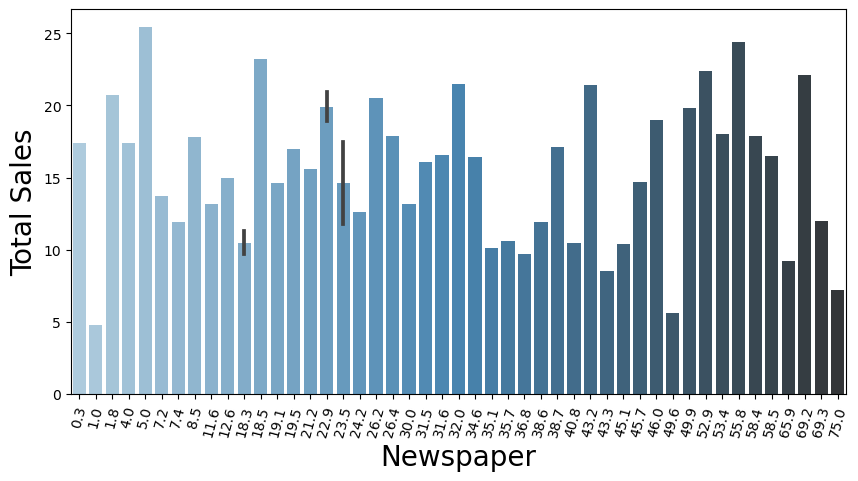

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(y="Sales", x="TV",palette="Blues_d", data=data.iloc[:50])
plt.xticks(rotation=75)
plt.xlabel("TV", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show();

plt.figure(figsize=(10,5))
sns.barplot(y="Sales", x="Radio",palette="Blues_d", data=data.iloc[:50])
plt.xticks(rotation=75)
plt.xlabel("Radio", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show();

plt.figure(figsize=(10,5))
sns.barplot(y="Sales", x="Newspaper",palette="Blues_d", data=data.iloc[:50])
plt.xticks(rotation=75)
plt.xlabel("Newspaper", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show();

# Use pointplot to compare sales distribution to other ;

<Figure size 2000x2000 with 0 Axes>

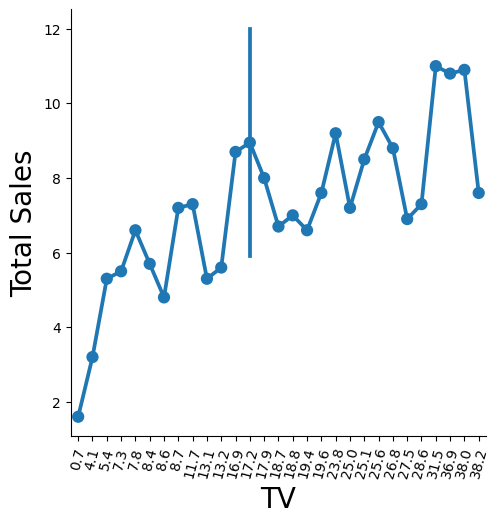

In [24]:
data2 = data.sort_values("TV")
plt.figure(figsize=(20,20))
sns.catplot(x='TV',y='Sales',data=data2.iloc[:30],kind='point')
plt.xticks(rotation=75)
plt.xlabel("TV", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show()

<Figure size 2000x2000 with 0 Axes>

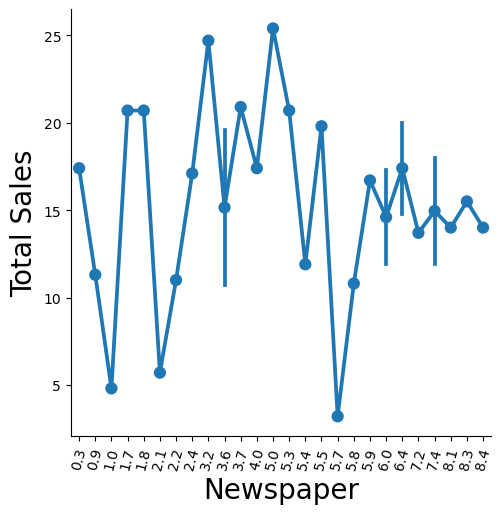

In [25]:
data2 = data.sort_values("Newspaper")
plt.figure(figsize=(20,20))
sns.catplot(x='Newspaper',y='Sales',data=data2.iloc[:30],kind='point')
plt.xticks(rotation=75)
plt.xlabel("Newspaper", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show()

<Figure size 2000x2000 with 0 Axes>

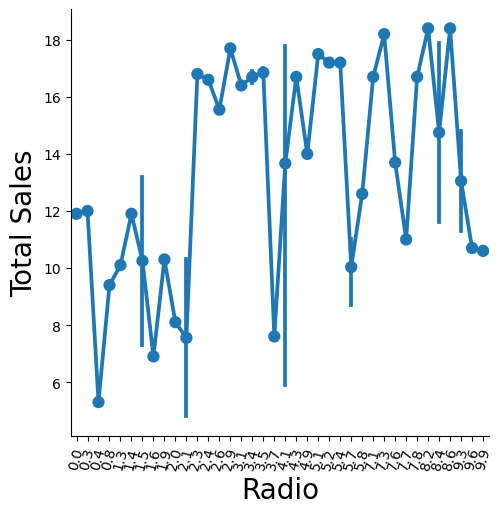

In [26]:
data2 = data.sort_values("Radio")
plt.figure(figsize=(20,20))
sns.catplot(x='Radio',y='Sales',data=data2.iloc[:50],kind='point')
plt.xticks(rotation=75)
plt.xlabel("Radio", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show()

## Manipulation,Transfoamation and Cleaning part are completed in all the above process Now we let's Continue to Machine learning Process

# import ML Related All Libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

<Axes: >

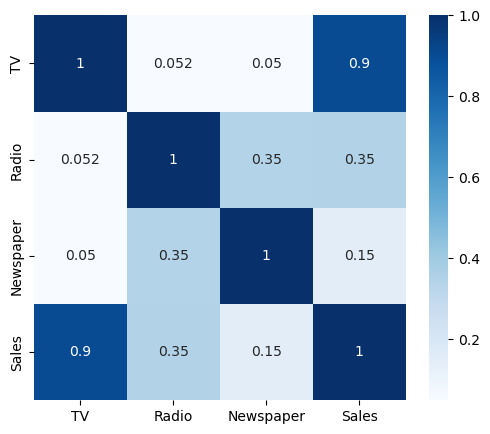

In [30]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

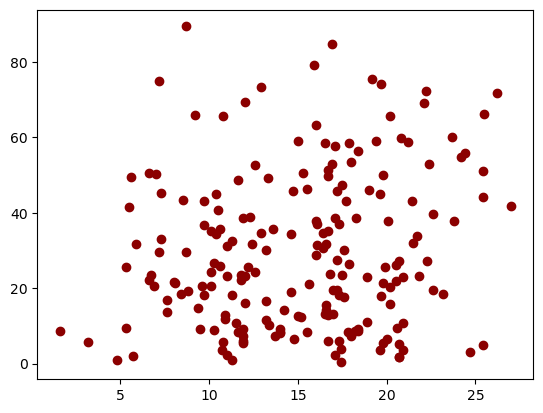

In [31]:
plt.scatter(data["Sales"],data["Newspaper"],color="darkRed")

In [33]:
# df=df.drop("Newspaper",axis=1)
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
y_test

19     14.6
170     8.4
64     16.0
177    16.7
72      8.8
87     16.0
5       7.2
120    15.5
12      9.2
152    16.6
61     24.2
76      6.9
165    16.9
97     20.5
115    12.6
7      13.2
34     11.9
136     9.5
38     10.1
168    17.1
111    21.8
145    10.3
46     10.6
159    12.9
140    10.9
113    20.9
179    17.6
185    22.6
93     22.2
45     16.1
17     24.4
137    20.8
138     9.6
98     25.4
23     20.5
196    14.0
128    24.7
4      17.9
67     13.4
125    10.6
Name: Sales, dtype: float64

In [35]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
print(f'X_tain Shape :{x_train.shape}')
print(f'X_test Shape :{x_test.shape}')
print(f'y_tain Shape :{y_train.shape}')
print(f'y_test Shape :{y_test.shape}')

X_tain Shape :(158, 3)
X_test Shape :(40, 3)
y_tain Shape :(158,)
y_test Shape :(40,)


# Here we'll check r2_score,because,accuracy_score's is not calculate in regression algorithumsc

## here we use test data**

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print("MSE:", mse)
print("MAE:", mae)
print("R2 score:", r2)

MSE: 2.70716375121302
MAE: 1.1780466149681035
R2 score: 90.26978637834333


## here we use train data**

In [38]:
y_pre=reg.predict(x_train)
mse_t = mean_squared_error(y_train, y_pre)
mae_t= mean_absolute_error(y_train, y_pre)
r3=r2_score(y_train,y_pre)*100
print("MSE:", mse_t)
print("MAE:", mae_t)
print("R2 score:", r3)

MSE: 2.768188022126754
MAE: 1.2513371612788158
R2 score: 89.95394667395139


In [39]:
x_train["c"]=1
import statsmodels.api as smf
reg_ols=smf.OLS(endog=y_train,exog=x_train).fit()

In [40]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     459.6
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.35e-76
Time:                        12:48:59   Log-Likelihood:                -304.63
No. Observations:                 158   AIC:                             617.3
Df Residuals:                     154   BIC:                             629.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.002     34.655      0.000       0.051       0.057
Radio          0.1077      0.010     11.249      0.000       0.089       0.127
Newspaper      0.0073      0.007      1.007      0.315      -0.007       0.021
c              4.4211      0.356     12.419      0.000       3.718       5.124
==============================================================================
Omnibus:                       16.146   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.687
Skew:                          -0.522   Prob(JB):                     1.60e-06
Kurtosis:                       4.722   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""